# **Generative Adversarial Networks (GANs)**
Generative Adversarial Network is an image generation adversarial algorithm.<br>
It consists of 2 models - Generator and Discriminator.<br>
Task of Generator: Generate realistic images, so that they fool discriminator<br>
Task of Discriminator: Classify images with high precision, so that he distinguishes real images and generated images<br>
This is pretty much it. Simple idea

In [1]:
import torch
from torch import nn
from torch import optim
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])
dataset = ImageFolder("/kaggle/input/anime-faces", transform=transform)

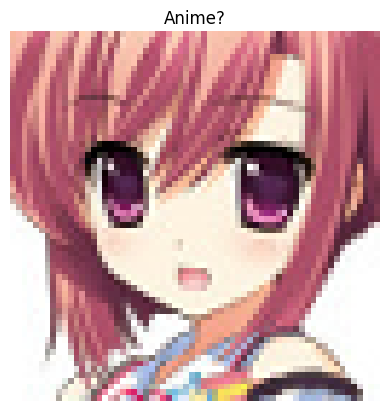

In [4]:
plt.axis("off")
plt.title("Anime?")
plt.imshow(dataset[0][0].permute(1, 2, 0));

In [5]:
# Everything is ready! Let's go!

In [6]:
dataloader = DataLoader(dataset, batch_size=256, shuffle=True, num_workers=4,
                       pin_memory=True,)

In [7]:
len(dataloader)

169

In [12]:
class Generator(nn.Module):
    def __init__(self, noise_size=100):
        super().__init__()
        self.noise_size = noise_size
        self.generator = nn.Sequential(
            nn.Linear(noise_size, 4*4*512),
            nn.Unflatten(1, (512, 4, 4)),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, noise):
        return self.generator(noise)


class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.discriminator = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Flatten(),
            nn.Linear(8 * 8 * 256, 1),
            nn.Sigmoid()
        )

    def forward(self, image):
        return self.discriminator(image)

In [15]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

loss_fn = nn.BCELoss()
gen_optim = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
disc_optim = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [16]:
from tqdm import tqdm

100%|██████████| 169/169 [00:22<00:00,  7.36it/s]


Epoch: 1 | 1.3879297343974417 + 6.560462260499913


100%|██████████| 169/169 [00:22<00:00,  7.36it/s]


Epoch: 2 | 1.814089591198779 + 4.751894836730146


100%|██████████| 169/169 [00:22<00:00,  7.37it/s]


Epoch: 3 | 1.6987985023792753 + 5.334292232990265


100%|██████████| 169/169 [00:22<00:00,  7.37it/s]


Epoch: 4 | 1.7109442752726534 + 4.629352565775526


100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 5 | 1.6232677102088928 + 4.443660477374462


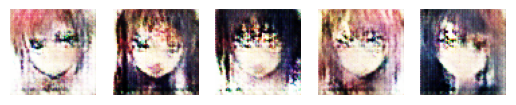

100%|██████████| 169/169 [00:22<00:00,  7.38it/s]


Epoch: 6 | 1.5643103845576023 + 4.745889912260339


100%|██████████| 169/169 [00:22<00:00,  7.38it/s]


Epoch: 7 | 1.5017704278864759 + 4.481830040191082


100%|██████████| 169/169 [00:22<00:00,  7.37it/s]


Epoch: 8 | 1.4042617659619514 + 4.292084010357552


100%|██████████| 169/169 [00:22<00:00,  7.35it/s]


Epoch: 9 | 1.488040232912023 + 4.373305860034963


100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 10 | 1.5560217125618712 + 4.408104588852284


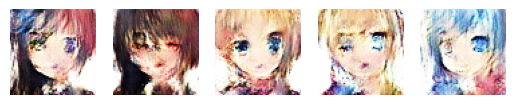

100%|██████████| 169/169 [00:22<00:00,  7.38it/s]


Epoch: 11 | 1.4203458777133455 + 4.138032468075448


100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 12 | 1.607142596802813 + 4.141163186189976


100%|██████████| 169/169 [00:22<00:00,  7.38it/s]


Epoch: 13 | 1.5180558670074382 + 3.888752823814433


100%|██████████| 169/169 [00:22<00:00,  7.37it/s]


Epoch: 14 | 1.5850057399019282 + 3.8979716427782747


100%|██████████| 169/169 [00:22<00:00,  7.38it/s]


Epoch: 15 | 1.5756342277881947 + 3.625574101158913


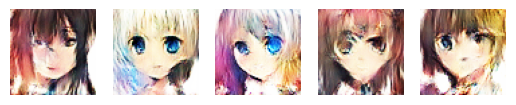

100%|██████████| 169/169 [00:23<00:00,  7.34it/s]


Epoch: 16 | 1.588586038731514 + 3.61044162004552


100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 17 | 1.6536700592396107 + 3.5507060270360173


100%|██████████| 169/169 [00:22<00:00,  7.38it/s]


Epoch: 18 | 1.661724201542266 + 3.491599719099542


100%|██████████| 169/169 [00:22<00:00,  7.38it/s]


Epoch: 19 | 1.7115079380096274 + 3.5235686744464205


100%|██████████| 169/169 [00:22<00:00,  7.38it/s]


Epoch: 20 | 1.658088763343527 + 3.4159909791134773


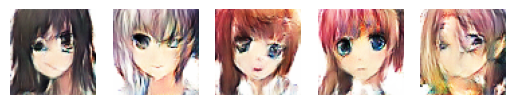

100%|██████████| 169/169 [00:22<00:00,  7.37it/s]


Epoch: 21 | 1.5128209863571411 + 3.269906433338815


100%|██████████| 169/169 [00:22<00:00,  7.35it/s]


Epoch: 22 | 1.785243900532418 + 3.426491752465038


100%|██████████| 169/169 [00:23<00:00,  7.32it/s]


Epoch: 23 | 1.5744827142421236 + 3.193663564768243


100%|██████████| 169/169 [00:22<00:00,  7.36it/s]


Epoch: 24 | 1.7089203944865694 + 3.3325301307312984


100%|██████████| 169/169 [00:22<00:00,  7.36it/s]


Epoch: 25 | 1.6694911680323012 + 3.2795248730702604


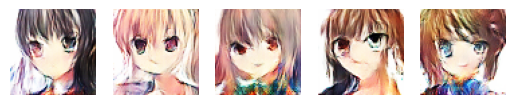

100%|██████████| 169/169 [00:22<00:00,  7.38it/s]


Epoch: 26 | 1.6341336781674243 + 3.284443333427957


100%|██████████| 169/169 [00:22<00:00,  7.40it/s]


Epoch: 27 | 1.5814766541440437 + 3.3328551459819713


100%|██████████| 169/169 [00:22<00:00,  7.40it/s]


Epoch: 28 | 1.7089192867279053 + 3.218340502219631


100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 29 | 1.6505496318035937 + 3.240509588033595


100%|██████████| 169/169 [00:22<00:00,  7.37it/s]


Epoch: 30 | 1.711525392659167 + 3.3093847416816873


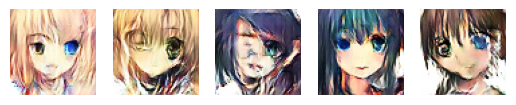

100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 31 | 1.5129759191198553 + 3.2339673505184496


100%|██████████| 169/169 [00:22<00:00,  7.38it/s]


Epoch: 32 | 1.8848953202683876 + 3.2972108242399196


100%|██████████| 169/169 [00:22<00:00,  7.38it/s]


Epoch: 33 | 1.4743027870959424 + 3.1226249020150365


100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 34 | 1.5809476546784664 + 3.2690318372655423


100%|██████████| 169/169 [00:22<00:00,  7.40it/s]


Epoch: 35 | 1.6341265154645799 + 3.2539025880396366


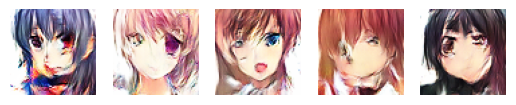

100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 36 | 1.5540228162674194 + 3.22706320057524


100%|██████████| 169/169 [00:22<00:00,  7.37it/s]


Epoch: 37 | 1.6930335068956335 + 3.2903093555347716


100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 38 | 1.512630510203382 + 3.213130831718445


100%|██████████| 169/169 [00:22<00:00,  7.40it/s]


Epoch: 39 | 1.5956606040609644 + 3.263498449579198


100%|██████████| 169/169 [00:22<00:00,  7.40it/s]


Epoch: 40 | 1.665679397101098 + 3.3305004817691257


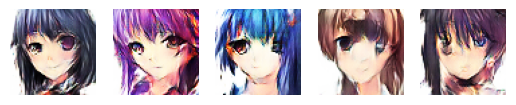

100%|██████████| 169/169 [00:22<00:00,  7.40it/s]


Epoch: 41 | 1.470615527731307 + 3.1415605709907855


100%|██████████| 169/169 [00:22<00:00,  7.40it/s]


Epoch: 42 | 1.6103588799212842 + 3.299283854187803


100%|██████████| 169/169 [00:22<00:00,  7.38it/s]


Epoch: 43 | 1.655524530943404 + 3.2924071022091392


100%|██████████| 169/169 [00:22<00:00,  7.37it/s]


Epoch: 44 | 1.4973197357451662 + 3.2041556159866618


100%|██████████| 169/169 [00:22<00:00,  7.40it/s]


Epoch: 45 | 1.57279279637844 + 3.284914717395255


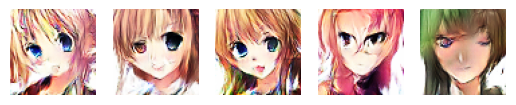

100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 46 | 1.5706581606509837 + 3.2391632034423505


100%|██████████| 169/169 [00:22<00:00,  7.40it/s]


Epoch: 47 | 1.70027708943854 + 3.3935026891846607


100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 48 | 1.4548228440132547 + 3.239277090163941


100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 49 | 1.625420958437818 + 3.3033201528832


100%|██████████| 169/169 [00:22<00:00,  7.40it/s]


Epoch: 50 | 1.509217660477821 + 3.2303693727292915


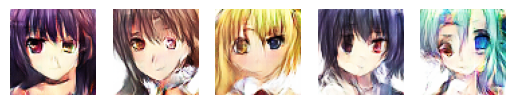

100%|██████████| 169/169 [00:22<00:00,  7.38it/s]


Epoch: 51 | 1.5363302725426695 + 3.2730266369403678


100%|██████████| 169/169 [00:22<00:00,  7.40it/s]


Epoch: 52 | 1.564258780251158 + 3.3512330486419355


100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 53 | 1.5524642549930734 + 3.352431867985015


100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 54 | 1.4384402918054702 + 3.31553393856008


100%|██████████| 169/169 [00:22<00:00,  7.40it/s]


Epoch: 55 | 1.5454728609703956 + 3.3879889462222446


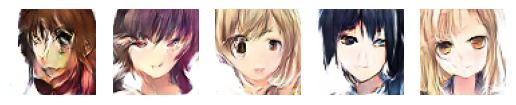

100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 56 | 1.5703235312979271 + 3.3757253288430102


100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 57 | 1.525297500351642 + 3.3244419212036944


100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 58 | 1.4141885340213776 + 3.316237576464389


100%|██████████| 169/169 [00:22<00:00,  7.39it/s]


Epoch: 59 | 1.644261284711513 + 3.3940906511580056


100%|██████████| 169/169 [00:22<00:00,  7.40it/s]


Epoch: 60 | 1.4499229382961354 + 3.3409466959060508


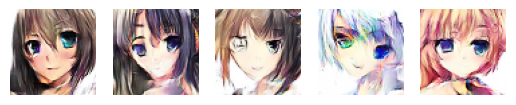

In [17]:
EPOCHS = 60

for epoch in range(EPOCHS):
    epoch_disc_loss = 0
    epoch_gen_loss = 0
    for real_imgs, _ in tqdm(dataloader):
        batch_size = real_imgs.size(0)
        generator.train()
        real_imgs = real_imgs.to(device)
        real_imgs = real_imgs * 2 - 1  # [-1 to 1]
        # ===DISCRIMINATOR TRAINING===
        # Loss on Real Images
        target = torch.full((batch_size, 1), 0.95, device=device)
        pred = discriminator(real_imgs)
        real_loss = loss_fn(pred, target)
        # Loss on Fake Images
        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        target = torch.full((batch_size, 1), 0.05, device=device)
        pred = discriminator(fake_images.detach())
        fake_loss = loss_fn(pred, target)
        disc_loss = real_loss + fake_loss
        epoch_disc_loss += disc_loss.item()
        disc_optim.zero_grad()
        disc_loss.backward()
        disc_optim.step()

        # ===GENERATOR TRAINING===
        target = torch.full((batch_size, 1), 1.0, device=device)
        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        pred = discriminator(fake_images)
        gen_loss = loss_fn(pred, target)
        epoch_gen_loss += gen_loss.item()
        gen_optim.zero_grad()
        gen_loss.backward()
        gen_optim.step()

    print(f"Epoch: {epoch+1} | {epoch_disc_loss / batch_size} + {epoch_gen_loss / batch_size}")
    # Visualize
    if (epoch+1) % 5 == 0:
        generator.eval()
        with torch.inference_mode():
            noise = torch.randn(5, 100, device=device)
            generated = generator(noise)
            generated = (generated + 1) / 2
            for n, img in enumerate(generated):
                plt.subplot(1, 5, n+1)
                plt.axis("off")
                plt.imshow(img.cpu().detach().permute(1, 2, 0).numpy());
            plt.show()

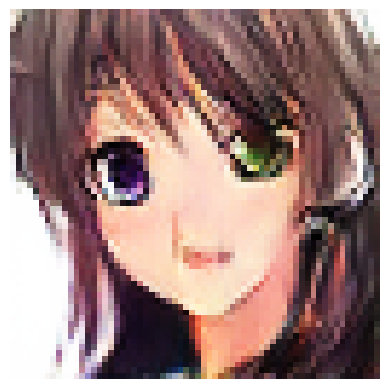

In [44]:
generator.eval()
with torch.inference_mode():
    noise = torch.randn(1, 100, device=device)
    generated = generator(noise)
    generated = (generated + 1) / 2
    plt.axis("off")
    plt.imshow(generated.squeeze(0).cpu().detach().permute(1, 2, 0).numpy());

They all look melted, but we'll improve over it soon!